In [ ]:
!pip install pyspark

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=c657fb045542b5aae0796f3f5e1c629ccb5c4fced8ec4df8027488b25111dddd
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download paramaggarwal/fashion-product-images-dataset

100% 23.1G/23.1G [05:43<00:00, 67.6MB/s]
100% 23.1G/23.1G [05:43<00:00, 72.1MB/s]


In [ ]:
!unzip fashion-product-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: fashion-dataset/styles/58128.json  
  inflating: fashion-dataset/styles/58129.json  
  inflating: fashion-dataset/styles/5813.json  
  inflating: fashion-dataset/styles/58131.json  
  inflating: fashion-dataset/styles/58132.json  
  inflating: fashion-dataset/styles/58133.json  
  inflating: fashion-dataset/styles/58135.json  
  inflating: fashion-dataset/styles/58136.json  
  inflating: fashion-dataset/styles/58137.json  
  inflating: fashion-dataset/styles/58138.json  
  inflating: fashion-dataset/styles/58139.json  
  inflating: fashion-dataset/styles/5814.json  
  inflating: fashion-dataset/styles/58140.json  
  inflating: fashion-dataset/styles/58141.json  
  inflating: fashion-dataset/styles/58143.json  
  inflating: fashion-dataset/styles/58144.json  
  inflating: fashion-dataset/styles/58145.json  
  inflating: fashion-dataset/styles/58146.json  
  inflating: fashion-dataset/styles/58147.json  
  inflating: fashion

In [ ]:
df2 = pd.read_csv('/content/fashion-dataset/images.csv', error_bad_lines=False)
df = pd.read_csv('/content/fashion-dataset/styles.csv', error_bad_lines=False)

In [ ]:
df.shape,df2.shape

((44424, 10), (44446, 2))

Ideally we should have same rows in both images and styles, but we have 44424 rows in styles_csv and 44446 rows in images_csv. This explains that around 22 rows were skipped while reading styles_csv. so rather than skipping the row we skipped the column that was causing Bad lines error

In [ ]:
df = pd.read_csv('/content/fashion-dataset/styles.csv', usecols=lambda column: column != 11)


In [ ]:
df.shape

(44446, 10)

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
# df.iloc[9024]
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('').getOrCreate()

In [ ]:
df_pyspark = spark.read.option('header','true').csv('/content/fashion-dataset/styles.csv', inferSchema=True).limit(5000)
df_pyspark.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- masterCategory: string (nullable = true)
 |-- subCategory: string (nullable = true)
 |-- articleType: string (nullable = true)
 |-- baseColour: string (nullable = true)
 |-- season: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- usage: string (nullable = true)
 |-- productDisplayName: string (nullable = true)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
print(df.isnull().sum())

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


In [ ]:
df_pyspark.select(['id','gender']).show()

+-----+------+
|   id|gender|
+-----+------+
|15970|   Men|
|39386|   Men|
|59263| Women|
|21379|   Men|
|53759|   Men|
| 1855|   Men|
|30805|   Men|
|26960| Women|
|29114|   Men|
|30039|   Men|
| 9204|   Men|
|48123| Women|
|18653|   Men|
|47957| Women|
|46885|  Boys|
|12369|   Men|
|29928|   Men|
|42419| Girls|
|51832| Women|
|47359| Women|
+-----+------+
only showing top 20 rows



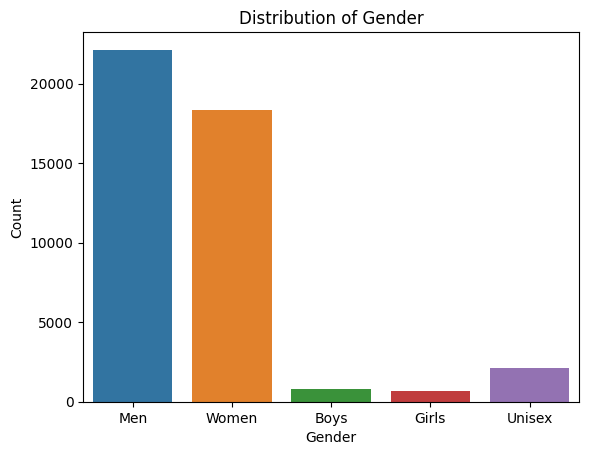

In [ ]:
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [ ]:
plt = px.pie(df, df['gender'],color_discrete_sequence=px.colors.sequential.dense, opacity=0.9,title="Percentage Share of Genders")
plt.show()

In [ ]:
seasons=pd.value_counts(df['season'])

fig = go.Figure(data=[go.Scatter(
    x=seasons.index, y=seasons.values,
    mode='markers',
    marker=dict(
        color=px.colors.sequential.Aggrnyl,
        opacity=[0.4, 0.8, 0.6, 0.4],
        size=[100, 80, 60, 40])
)]
               )
fig.update_xaxes(title_text="Season wise distribution")
fig.show()

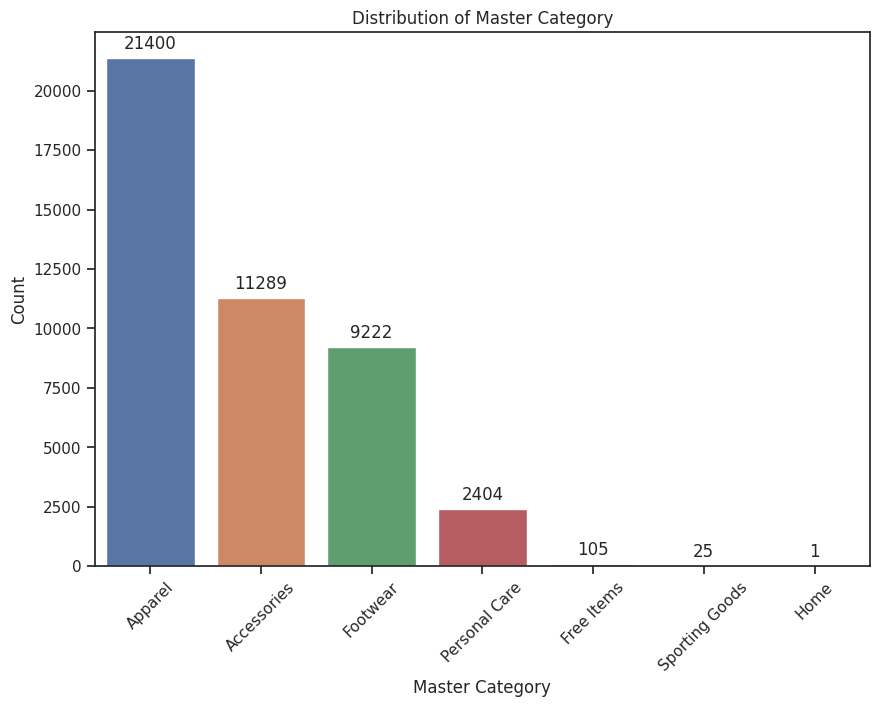

In [ ]:

sns.set(style="ticks")

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='masterCategory', data=df)
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.title('Distribution of Master Category')
plt.xticks(rotation=45)
plt.subplots_adjust(top=1)

# Annotate count values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


In [ ]:
catcounts=pd.value_counts(df['subCategory'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title_text="Sub category distribution")
fig.show()


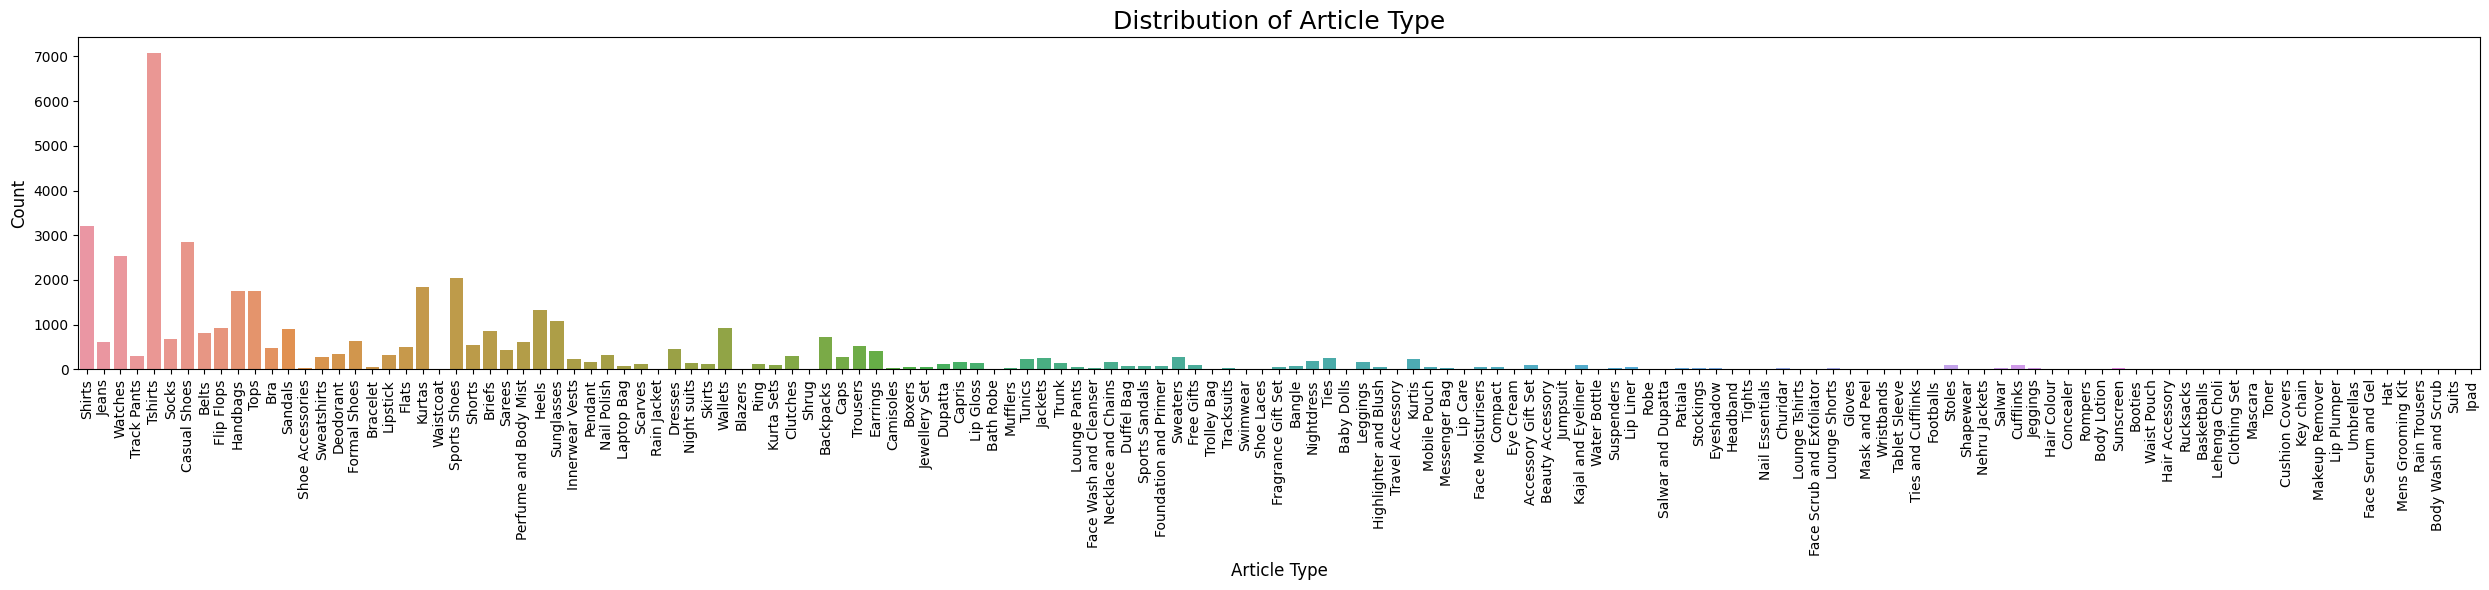

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(x='articleType', data=df)
plt.xlabel('Article Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Article Type', fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


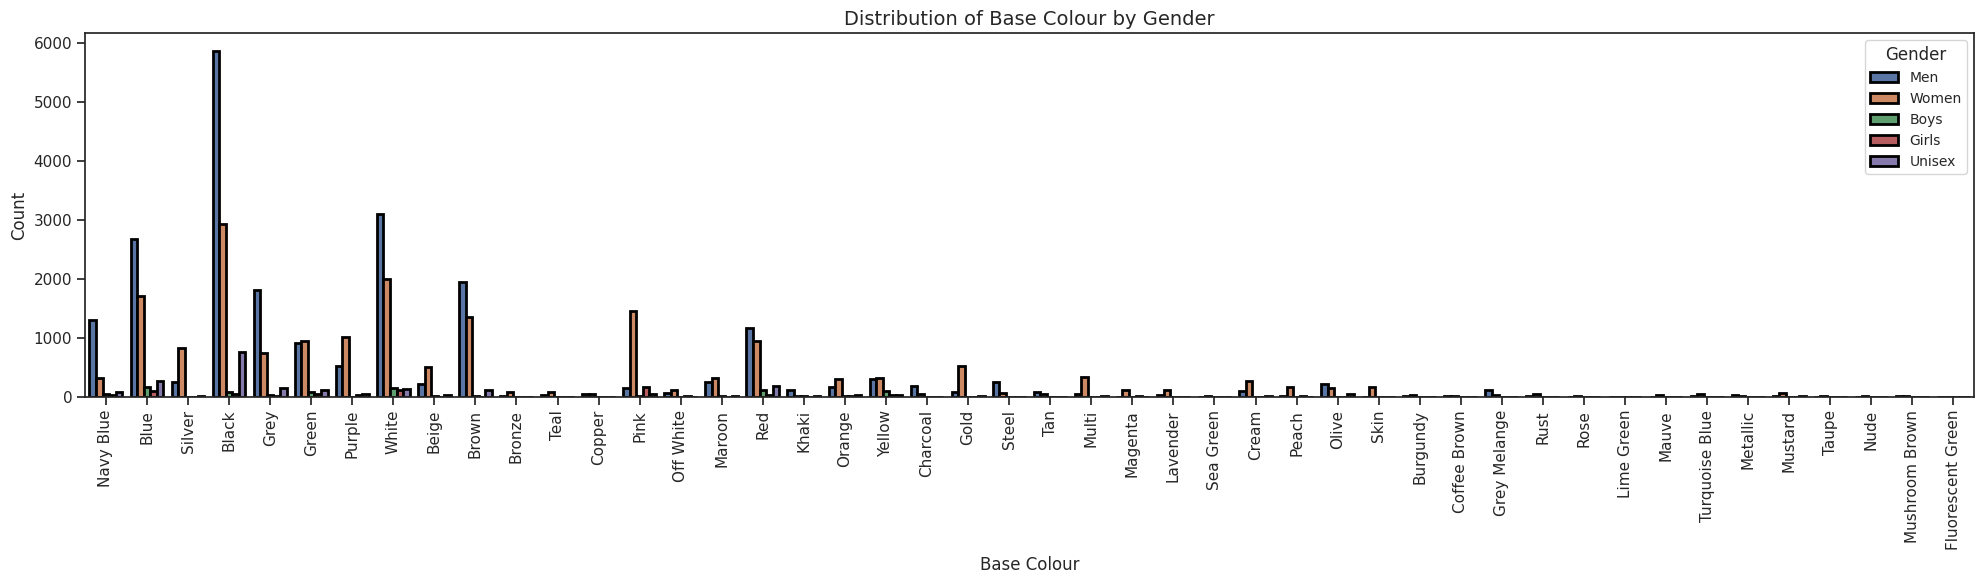

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='baseColour', hue='gender', data=df, linewidth=2, edgecolor='black')
plt.xlabel('Base Colour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Base Colour by Gender', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()
plt.show()


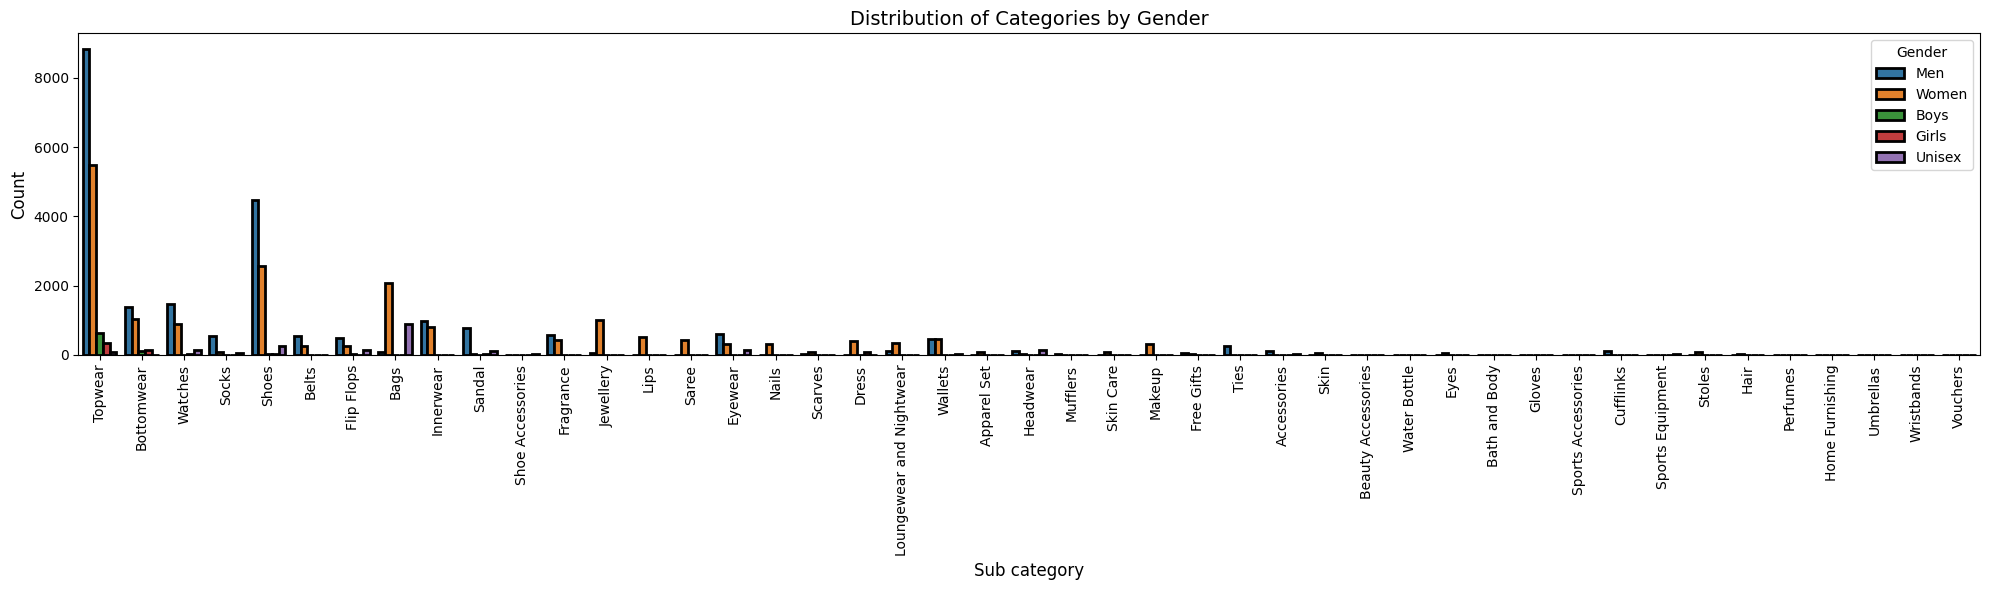

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='subCategory', hue='gender', data=df, linewidth=2, edgecolor='black')
plt.xlabel('Sub category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Categories by Gender', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
catcounts=pd.value_counts(df['usage'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title_text="Usage wise distribution")
fig.show()

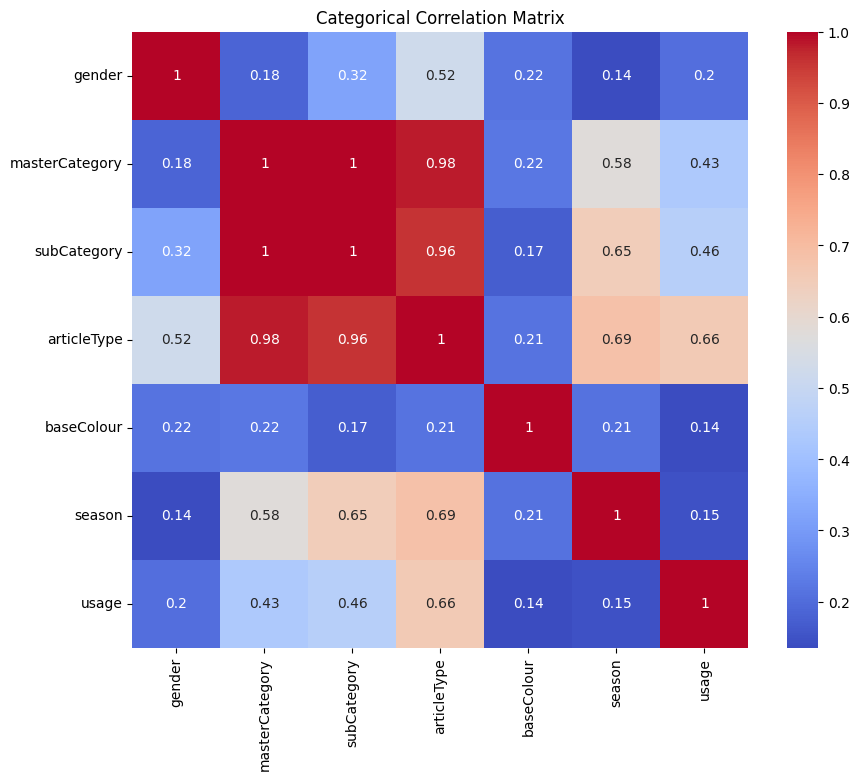

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



categorical_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']


corr_matrix = np.zeros((len(categorical_columns), len(categorical_columns)))

for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        confusion_matrix = pd.crosstab(df[col1], df[col2])
        corr_matrix[i, j] = cramers_v(confusion_matrix.values)

corr_df = pd.DataFrame(corr_matrix, columns=categorical_columns, index=categorical_columns)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', square=True)
plt.title('Categorical Correlation Matrix')
plt.show()
